In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install sklearn

In [ ]:
import sklearn
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.autograd import Variable
import torch.utils.data as data_utils
import seaborn as sns
import pandas as pd
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from torch import optim
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import keras 
import sklearn
%matplotlib inline

In [ ]:
def remove_space_columns(data):
    temp={}
    for i in data:
        temp[i]=i.replace(' ','_')
    #print(temp)
    return temp

In [ ]:
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/CIN/duxin201903.csv',sep=';')

In [ ]:
data.rename(columns=remove_space_columns(data.columns),inplace=True)

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5969,47,1,1,1,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,37,4,1,0,0,1,10000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5971,47,4,1,0,0,1,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.Pathology.replace([1],0,inplace=True)
data.Pathology.replace([2,3],1,inplace=True)

data.v_16

0       0
1       0
2       0
3       0
4       0
       ..
5968    0
5969    1
5970    0
5971    0
5972    0
Name: v_16, Length: 5973, dtype: int64

get dummies for the TCT and create bin for the ages

In [ ]:
data['Agele24']=0
data['Agebw24_34']=0
data['AgeBw34_44']=0
data['AgeBw44and54']=0
data['AgeBw54and64']=0
data['Ageabove64']=0

In [ ]:
data
max_p = data['viral_load'].max()
print(max_p)
data['viral_load'] = data['viral_load'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.1'] = data['viral_load.1'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.2'] = data['viral_load.2'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.3'] = data['viral_load.3'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.4'] = data['viral_load.4'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.5'] = data['viral_load.5'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.6'] = data['viral_load.6'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.7'] = data['viral_load.7'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.8'] = data['viral_load.8'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.9'] = data['viral_load.9'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.10'] = data['viral_load.10'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.11'] = data['viral_load.11'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data['viral_load.12'] = data['viral_load.12'].replace({10000000:7, 100000:5, 10000:4, 1000000:6, 1000:3, 100:2, 10:1})
data

10000000


,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
max_q = data['viral_load'].max()
print(max_q)



7


In [ ]:
data['Agele24']=data.Age<=24
data['Agebw24_34']=(data.Age>24)& (data.Age<=34)
data['AgeBw34_44']=(data.Age>34)& (data.Age<=45)
data['AgeBw44and54']=(data.Age>45)& (data.Age<=55)
data['AgeBw54and64']=(data.Age>55)& (data.Age<=65)
data['Ageabove64']=(data.Age>65)

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,False,False,False
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,False,False
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,False,False,False
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,True,False,False


In [ ]:
data['Agele24']=data['Agele24'].replace({True:1,False:0})
data['Agebw24_34']=data['Agebw24_34'].replace({True:1,False:0})

data['AgeBw34_44']=data['AgeBw34_44'].replace({True:1,False:0})
data['AgeBw44and54']=data['AgeBw44and54'].replace({True:1,False:0})
data['AgeBw54and64']=data['AgeBw54and64'].replace({True:1,False:0})
data['Ageabove64']=data['Ageabove64'].replace({True:1,False:0})

In [ ]:
data

,Age,TCT,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64
0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,30,4,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5969,47,1,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5970,37,4,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5971,47,4,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df=data.copy()

Get dummies for the TCT columns

In [ ]:
dum=pd.get_dummies(df.TCT,prefix='TCT')

In [ ]:
dum

,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
5968,0,0,0,0,1
5969,0,1,0,0,0
5970,0,0,0,0,1
5971,0,0,0,0,1


In [ ]:
if 'TCT' in df.columns:
    del df['TCT']
if 'Age' in df.columns:
    del df['Age']
    
# df=pd.concat([df,dum],axis=1)

In [ ]:
col = df.columns
print(col)

Index(['HPV_result', 'v_16', 'viral_load', 'v_18', 'viral_load.1', 'v_31',
       'viral_load.2', 'v_33', 'viral_load.3', 'v_35', 'viral_load.4', 'v_39',
       'viral_load.5', 'v_45', 'viral_load.6', 'v_51', 'viral_load.7', 'v_52',
       'viral_load.8', 'v_56', 'viral_load.9', 'v_58', 'viral_load.10', 'v_59',
       'viral_load.11', 'v_68', 'viral_load.12', 'Pathology', 'Agele24',
       'Agebw24_34', 'AgeBw34_44', 'AgeBw44and54', 'AgeBw54and64',
       'Ageabove64'],
      dtype='object')


In [ ]:


y = df.Pathology
list = ['Agele24','Agebw24_34','AgeBw34_44','AgeBw44and54','AgeBw54and64', 'Ageabove64']
v = df[['Agele24','Agebw24_34','AgeBw34_44','AgeBw44and54','AgeBw54and64', 'Ageabove64']].copy()
# list = ['Pathology']
x = df.drop(list, axis = 1)
x.head()
x.shape

(5973, 28)

In [ ]:
x['max_virus']= x.max(axis = 1)
print(x)

x

      HPV_result  v_16  viral_load  ...  viral_load.12  Pathology  max_virus
0              0     0           0  ...              0          0          0
1              0     0           0  ...              0          0          0
2              0     0           0  ...              0          0          0
3              0     0           0  ...              0          0          0
4              0     0           0  ...              0          0          0
...          ...   ...         ...  ...            ...        ...        ...
5968           1     0           0  ...              0          1          5
5969           1     1           5  ...              0          0          5
5970           1     0           0  ...              0          1          4
5971           1     0           0  ...              0          0          6
5972           1     0           0  ...              0          1          5

[5973 rows x 29 columns]


,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,max_virus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
x=pd.concat([x,v,dum],axis=1)
x

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,Pathology,max_virus,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,1,0,0,0,0,0,0,0,0,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,1,0,0,0,0,0,0,0,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
x = x.drop('Pathology', axis = 1)
x

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_35,viral_load.4,v_39,viral_load.5,v_45,viral_load.6,v_51,viral_load.7,v_52,viral_load.8,v_56,viral_load.9,v_58,viral_load.10,v_59,viral_load.11,v_68,viral_load.12,max_virus,Agele24,Agebw24_34,AgeBw34_44,AgeBw44and54,AgeBw54and64,Ageabove64,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,1


Number of patients with CIN:  632
number of patients without CIN:  5341


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


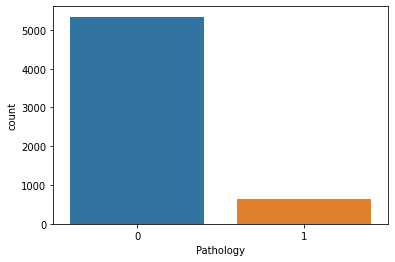

In [ ]:
import seaborn as sns
ax = sns.countplot(y,label="Count") 
N,Y = y.value_counts()

print('Number of patients with CIN: ' , Y)
print('number of patients without CIN: ', N)


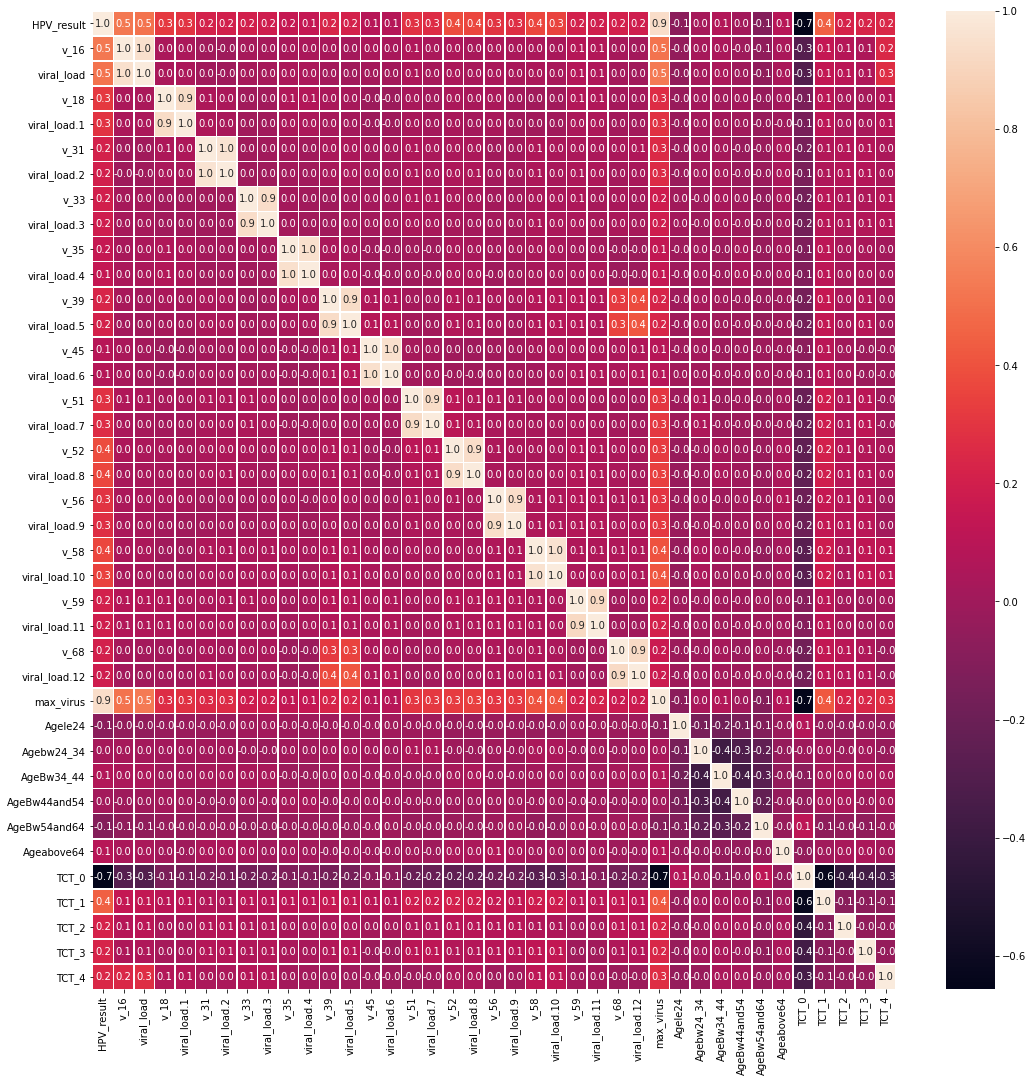

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Correlation map. Looking at the correlation mapping the viral_load and v_16 looks higly correlated. So choosing v_16 and droping viral_load

In [ ]:
X=x.copy()
Y=df['Pathology']
# del X['Pathology']
X=X
X.shape



(5973, 39)

In [ ]:
list2 = ['v_39', 'viral_load.5', 'v_51', 'viral_load.7', 'v_35', 'viral_load.4', 'v_45', 'viral_load.6', 'v_59', 'viral_load.11', 'v_68', 'viral_load.12', 'Agele24','AgeBw54and64', 'Agebw24_34', 'AgeBw34_44', 'AgeBw44and54', 'Ageabove64', 'v_56', 'viral_load.9',]
X = X.drop(list2, axis =1)

In [ ]:
X

,HPV_result,v_16,viral_load,v_18,viral_load.1,v_31,viral_load.2,v_33,viral_load.3,v_52,viral_load.8,v_58,viral_load.10,max_virus,TCT_0,TCT_1,TCT_2,TCT_3,TCT_4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,1,0,0,1,5,0,0,0,0,0,0,0,0,5,0,0,0,0,1
5969,1,1,5,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0
5970,1,0,0,1,4,0,0,0,0,0,0,0,0,4,0,0,0,0,1
5971,1,0,0,1,6,0,0,0,0,0,0,0,0,6,0,0,0,0,1


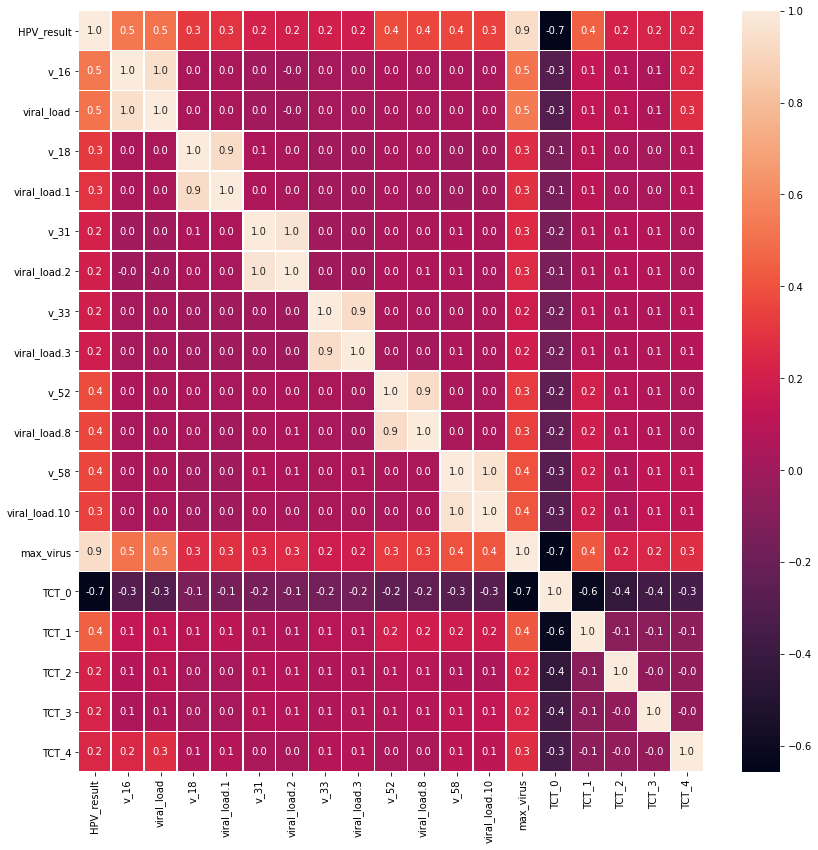

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
def Scalar(X,Y):
    min_max_scaler = preprocessing.MinMaxScaler()
    NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.8", "viral_load.10", "max_virus"]
    # ["viral_load.1", "viral_load.3", "viral_load.5", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.11", "viral_load.12"]
    #["viral_load.2", "viral_load.3", "viral_load.4", "viral_load.5", "viral_load.6", "viral_load.7","viral_load.8", "viral_load.9", "viral_load.10", "viral_load.11", "viral_load.12"]
    #['viral_load','viral_load.2', 'viral_load.4', 'viral_load.6', 'viral_load.10']

    for i in NUMERIC_COLUMN:
        X[i]=min_max_scaler.fit_transform(X[i].values.astype('float32').reshape(-1,1))
        
      
    return X, Y
  

In [ ]:

def getNewData():
    X1, Y1 = Scalar(X,Y)
    NUMERIC_COLUMN = ["viral_load", "viral_load.1", "viral_load.2", "viral_load.3", "viral_load.8", "viral_load.10", "max_virus"]

    CATEGORICAL_COLUMN = ["HPV_result", "v_16", "v_18", "v_31", "v_33", "v_52", "v_58"] 

    LABEL_COLUMN = "Pathology"
    CATEGORICAL_COLUMN_WITH_IDENTITY = ["TCT_0", "TCT_1", "TCT_2", "TCT_3", "TCT_4"]


    for i in CATEGORICAL_COLUMN:
      X1[i]=np.array(X1[i].values.astype('float32'))
      # x_test[i]=np.array(x_test[i].values.astype('float32'))

    for i in X[CATEGORICAL_COLUMN]:
      X1[i]=np.array(X1[i].values.astype('int64'))
      # x_test[i]=np.array(x_test[i].values.astype('int64'))

    for i in X[CATEGORICAL_COLUMN_WITH_IDENTITY]:
      X1[i]=np.array(X1[i].values.astype('int64'))
      # x_test[i]=np.array(x_test[i].values.astype('int64'))

    Y1=pd.DataFrame(data=np.array(Y1.values.astype('int64')),columns=['Pathology'])
    # y_test=pd.DataFrame(data=np.array(y_test.values.astype('int64')),columns=['Pathology'])

    return X1, Y1


In [ ]:
X1, Y1 = getNewData()

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Define per-fold score containers
num_folds = 10
acc_per_fold = []
loss_per_fold = []
rec_per_fold = []
pre_per_fold = []
f1_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  X_train, X_test = inputs[train], inputs[test]
  y_train, y_test = targets[train], targets[test]
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim=19, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # fit the keras model on the dataset
  model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=10)


  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  # f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  print('Recall of ', scores[4])
  print('Precision of ', scores[3])
  print('F1score of ', scores[2])
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  rec_per_fold.append(scores[4])
  pre_per_fold.append(scores[3])
  f1_per_fold.append(scores[2])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print(f'> Fold {i+1} - F1_Score: {f1_per_fold[i]} - Precision: {pre_per_fold[i]} - Recall: {rec_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Recall: {np.mean(rec_per_fold)}')
print(f'> Precision: {np.mean(pre_per_fold)}')
print(f'> F1_score: {np.mean(f1_per_fold)}')
print('------------------------------------------------------------------------')



------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
538/538 [==============================] - 5s 4ms/step - loss: 0.4880 - accuracy: 0.7934 - f1_m: 0.3227 - precision_m: 0.3169 - recall_m: 0.4217 - val_loss: 0.1694 - val_accuracy: 0.9064 - val_f1_m: 0.3011 - val_precision_m: 0.3417 - val_recall_m: 0.2972
Epoch 2/100
538/538 [==============================] - 2s 3ms/step - loss: 0.1653 - accuracy: 0.9267 - f1_m: 0.3386 - precision_m: 0.3826 - recall_m: 0.3270 - val_loss: 0.1538 - val_accuracy: 0.9164 - val_f1_m: 0.3456 - val_precision_m: 0.3778 - val_recall_m: 0.3500
Epoch 3/100
538/538 [==============================] - 2s 3ms/step - loss: 0.1636 - accuracy: 0.9205 - f1_m: 0.3625 - precision_m: 0.3950 - recall_m: 0.3616 - val_loss: 0.1536 - val_accuracy: 0.9164 - val_f1_m: 0.3411 - val_precision_m: 0.3750 - val_recall_m: 0.3361
Epoch 4/100
538/538 [==============================] - 2s 3ms/step - loss: 0.1603 - accuracy: 0.9224 -

Deep Learning with class sampling

In [ ]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np
from keras import backend as K
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1

# # Split data
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
# Define per-fold score containers
num_folds = 10
acc_per_fold = []
loss_per_fold = []
rec_per_fold = []
pre_per_fold = []
f1_per_fold = []

smoter = SMOTE(random_state=42)

# Merge inputs and targets
X1 = np.concatenate((X_train, X_test), axis=0)
Y1 = np.concatenate((y_train, y_test), axis=0)
# Y1 = np.concatenate((y_train[:,None], y_test), axis=0)

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(inputs, targets):
  X_train, X_test = X1[train_index], X1[test_index]
  y_train, y_test = Y1[train_index], Y1[test_index]
  X_train_upsample, y_train_upsample = SMOTE().fit_sample(X_train, y_train)
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim=19, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # fit the keras model on the dataset
  model.fit(X_train_upsample, y_train_upsample, validation_data=(X_test,y_test), epochs=100, batch_size=10)
  # model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=10)
  # model.fit(x_train, y_train, epochs=150, batch_size=10)
  # evaluate the keras model
  # _, accuracy = model.evaluate(x_test, y_test)
  # _, accuracy = model.evaluate(x_train, y_train)
  # print('Accuracy: %.2f' % (accuracy*100))

  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  # f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  print('Recall of ', scores[4])
  print('Precision of ', scores[3])
  print('F1score of ', scores[2])
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  rec_per_fold.append(scores[4])
  pre_per_fold.append(scores[3])
  f1_per_fold.append(scores[2])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  print(f'> Fold {i+1} - F1_Score: {f1_per_fold[i]} - Precision: {pre_per_fold[i]} - Recall: {rec_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Recall: {np.mean(rec_per_fold)}')
print(f'> Precision: {np.mean(pre_per_fold)}')
print(f'> F1_score: {np.mean(f1_per_fold)}')
print('------------------------------------------------------------------------')



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
962/962 [==============================] - 4s 3ms/step - loss: 0.4292 - accuracy: 0.8275 - f1_m: 0.8446 - precision_m: 0.7788 - recall_m: 0.9650 - val_loss: 0.3052 - val_accuracy: 0.8411 - val_f1_m: 0.4036 - val_precision_m: 0.3403 - val_recall_m: 0.5611
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2507 - accuracy: 0.8962 - f1_m: 0.8914 - precision_m: 0.8508 - recall_m: 0.9594 - val_loss: 0.2953 - val_accuracy: 0.8361 - val_f1_m: 0.3929 - val_precision_m: 0.3292 - val_recall_m: 0.5569
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2435 - accuracy: 0.9006 - f1_m: 0.8947 - precision_m: 0.8541 - recall_m: 0.9632 - val_loss: 0.2684 - val_accuracy: 0.8395 - val_f1_m: 0.3952 - val_precision_m: 0.3292 - val_recall_m: 0.5611
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2442 - accuracy: 0.8953 -

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4678 - accuracy: 0.8794 - f1_m: 0.8771 - precision_m: 0.8225 - recall_m: 0.9669 - val_loss: 0.2720 - val_accuracy: 0.8545 - val_f1_m: 0.4921 - val_precision_m: 0.4175 - val_recall_m: 0.6806
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2703 - accuracy: 0.8836 - f1_m: 0.8768 - precision_m: 0.8497 - recall_m: 0.9281 - val_loss: 0.2859 - val_accuracy: 0.8395 - val_f1_m: 0.4789 - val_precision_m: 0.3967 - val_recall_m: 0.6861
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2603 - accuracy: 0.8929 - f1_m: 0.8896 - precision_m: 0.8480 - recall_m: 0.9578 - val_loss: 0.2680 - val_accuracy: 0.8395 - val_f1_m: 0.4789 - val_precision_m: 0.3967 - val_recall_m: 0.6861
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2533 - accuracy: 0.8999 - f1_m: 0.8984 - precision_m: 0.8511 - recall_m: 0.9723 - val_loss: 0.2688 - val_accuracy: 0.8428 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4589 - accuracy: 0.8024 - f1_m: 0.7145 - precision_m: 0.7316 - recall_m: 0.7572 - val_loss: 0.2778 - val_accuracy: 0.8495 - val_f1_m: 0.4522 - val_precision_m: 0.3865 - val_recall_m: 0.6014
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2560 - accuracy: 0.8951 - f1_m: 0.8934 - precision_m: 0.8511 - recall_m: 0.9608 - val_loss: 0.2556 - val_accuracy: 0.8562 - val_f1_m: 0.4593 - val_precision_m: 0.3948 - val_recall_m: 0.6014
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2511 - accuracy: 0.8994 - f1_m: 0.8962 - precision_m: 0.8510 - recall_m: 0.9666 - val_loss: 0.2439 - val_accuracy: 0.8612 - val_f1_m: 0.4607 - val_precision_m: 0.3973 - val_recall_m: 0.6014
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2502 - accuracy: 0.9039 - f1_m: 0.9014 - precision_m: 0.8531 - recall_m: 0.9748 - val_loss: 0.2531 - val_accuracy: 0.8612 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 3s 3ms/step - loss: 0.5519 - accuracy: 0.6238 - f1_m: 0.4540 - precision_m: 0.5389 - recall_m: 0.4459 - val_loss: 0.3118 - val_accuracy: 0.8275 - val_f1_m: 0.4543 - val_precision_m: 0.3631 - val_recall_m: 0.6917
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2507 - accuracy: 0.9000 - f1_m: 0.8981 - precision_m: 0.8564 - recall_m: 0.9669 - val_loss: 0.3129 - val_accuracy: 0.8291 - val_f1_m: 0.4598 - val_precision_m: 0.3658 - val_recall_m: 0.7000
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2396 - accuracy: 0.9054 - f1_m: 0.9029 - precision_m: 0.8596 - recall_m: 0.9699 - val_loss: 0.2870 - val_accuracy: 0.8308 - val_f1_m: 0.4598 - val_precision_m: 0.3658 - val_recall_m: 0.7000
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2391 - accuracy: 0.9084 - f1_m: 0.9038 - precision_m: 0.8554 - recall_m: 0.9793 - val_loss: 0.2926 - val_accuracy: 0.8325 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4411 - accuracy: 0.8756 - f1_m: 0.8723 - precision_m: 0.8238 - recall_m: 0.9508 - val_loss: 0.3289 - val_accuracy: 0.8526 - val_f1_m: 0.4688 - val_precision_m: 0.4061 - val_recall_m: 0.6250
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2654 - accuracy: 0.8838 - f1_m: 0.8809 - precision_m: 0.8517 - recall_m: 0.9356 - val_loss: 0.2673 - val_accuracy: 0.8543 - val_f1_m: 0.4657 - val_precision_m: 0.4047 - val_recall_m: 0.6194
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2556 - accuracy: 0.8918 - f1_m: 0.8896 - precision_m: 0.8555 - recall_m: 0.9479 - val_loss: 0.2985 - val_accuracy: 0.8509 - val_f1_m: 0.4686 - val_precision_m: 0.4042 - val_recall_m: 0.6333
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2519 - accuracy: 0.9001 - f1_m: 0.8952 - precision_m: 0.8550 - recall_m: 0.9628 - val_loss: 0.3086 - val_accuracy: 0.8576 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4753 - accuracy: 0.7824 - f1_m: 0.7941 - precision_m: 0.7393 - recall_m: 0.8842 - val_loss: 0.3331 - val_accuracy: 0.8224 - val_f1_m: 0.4268 - val_precision_m: 0.3414 - val_recall_m: 0.6333
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2545 - accuracy: 0.8910 - f1_m: 0.8864 - precision_m: 0.8424 - recall_m: 0.9611 - val_loss: 0.2774 - val_accuracy: 0.8476 - val_f1_m: 0.4103 - val_precision_m: 0.3456 - val_recall_m: 0.5611
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2488 - accuracy: 0.8998 - f1_m: 0.8953 - precision_m: 0.8508 - recall_m: 0.9678 - val_loss: 0.2873 - val_accuracy: 0.8492 - val_f1_m: 0.4687 - val_precision_m: 0.4039 - val_recall_m: 0.6194
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2408 - accuracy: 0.9036 - f1_m: 0.9018 - precision_m: 0.8553 - recall_m: 0.9749 - val_loss: 0.3135 - val_accuracy: 0.8425 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4340 - accuracy: 0.8512 - f1_m: 0.8298 - precision_m: 0.8416 - recall_m: 0.8661 - val_loss: 0.3189 - val_accuracy: 0.8409 - val_f1_m: 0.4033 - val_precision_m: 0.3525 - val_recall_m: 0.5417
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2495 - accuracy: 0.8932 - f1_m: 0.8892 - precision_m: 0.8632 - recall_m: 0.9380 - val_loss: 0.3573 - val_accuracy: 0.8258 - val_f1_m: 0.4371 - val_precision_m: 0.3644 - val_recall_m: 0.6167
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2491 - accuracy: 0.8949 - f1_m: 0.8875 - precision_m: 0.8488 - recall_m: 0.9562 - val_loss: 0.3754 - val_accuracy: 0.8342 - val_f1_m: 0.4586 - val_precision_m: 0.3811 - val_recall_m: 0.6500
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2455 - accuracy: 0.9023 - f1_m: 0.8975 - precision_m: 0.8571 - recall_m: 0.9638 - val_loss: 0.3549 - val_accuracy: 0.8409 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.5010 - accuracy: 0.7363 - f1_m: 0.7153 - precision_m: 0.7062 - recall_m: 0.7649 - val_loss: 0.2863 - val_accuracy: 0.8593 - val_f1_m: 0.4676 - val_precision_m: 0.4147 - val_recall_m: 0.6069
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2693 - accuracy: 0.8875 - f1_m: 0.8823 - precision_m: 0.8536 - recall_m: 0.9367 - val_loss: 0.2937 - val_accuracy: 0.8492 - val_f1_m: 0.4481 - val_precision_m: 0.3869 - val_recall_m: 0.6069
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2551 - accuracy: 0.8891 - f1_m: 0.8828 - precision_m: 0.8494 - recall_m: 0.9408 - val_loss: 0.2922 - val_accuracy: 0.8492 - val_f1_m: 0.4554 - val_precision_m: 0.3925 - val_recall_m: 0.6153
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2423 - accuracy: 0.8938 - f1_m: 0.8914 - precision_m: 0.8558 - recall_m: 0.9521 - val_loss: 0.2415 - val_accuracy: 0.8677 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4116 - accuracy: 0.8400 - f1_m: 0.8522 - precision_m: 0.7928 - recall_m: 0.9555 - val_loss: 0.3405 - val_accuracy: 0.8375 - val_f1_m: 0.4560 - val_precision_m: 0.3769 - val_recall_m: 0.6458
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2538 - accuracy: 0.8930 - f1_m: 0.8885 - precision_m: 0.8505 - recall_m: 0.9523 - val_loss: 0.2979 - val_accuracy: 0.8425 - val_f1_m: 0.4574 - val_precision_m: 0.3825 - val_recall_m: 0.6319
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2582 - accuracy: 0.8905 - f1_m: 0.8875 - precision_m: 0.8428 - recall_m: 0.9577 - val_loss: 0.3023 - val_accuracy: 0.8476 - val_f1_m: 0.4644 - val_precision_m: 0.3881 - val_recall_m: 0.6403
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2416 - accuracy: 0.9027 - f1_m: 0.9021 - precision_m: 0.8578 - recall_m: 0.9715 - val_loss: 0.2909 - val_accuracy: 0.8526 - val_f1_m: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


962/962 [==============================] - 4s 3ms/step - loss: 0.4562 - accuracy: 0.7902 - f1_m: 0.8188 - precision_m: 0.7620 - recall_m: 0.9277 - val_loss: 0.2976 - val_accuracy: 0.8559 - val_f1_m: 0.4182 - val_precision_m: 0.3575 - val_recall_m: 0.5583
Epoch 2/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2644 - accuracy: 0.8838 - f1_m: 0.8776 - precision_m: 0.8465 - recall_m: 0.9371 - val_loss: 0.2961 - val_accuracy: 0.8459 - val_f1_m: 0.4145 - val_precision_m: 0.3528 - val_recall_m: 0.5667
Epoch 3/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2450 - accuracy: 0.8930 - f1_m: 0.8886 - precision_m: 0.8444 - recall_m: 0.9609 - val_loss: 0.2815 - val_accuracy: 0.8459 - val_f1_m: 0.4145 - val_precision_m: 0.3528 - val_recall_m: 0.5667
Epoch 4/100
962/962 [==============================] - 3s 3ms/step - loss: 0.2398 - accuracy: 0.8993 - f1_m: 0.8988 - precision_m: 0.8610 - recall_m: 0.9612 - val_loss: 0.2421 - val_accuracy: 0.8526 - val_f1_m: 